<a href="https://colab.research.google.com/github/Is7ac/ML/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.express import scatter_3d
iris = datasets.load_iris()

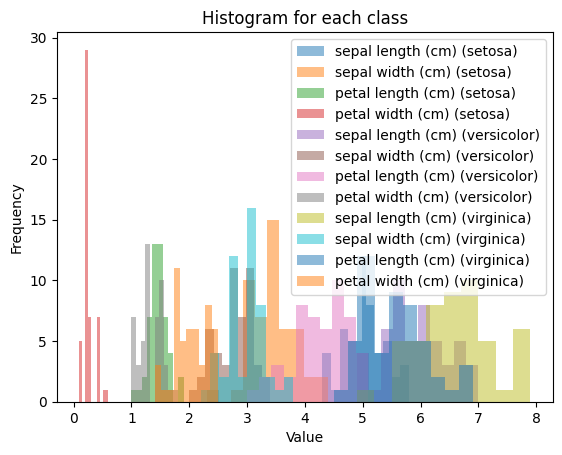

In [ ]:
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names  # Target names

# Plot histograms for each class
for i, target_name in enumerate(target_names):
    X_class = X[y == i]
    for feature_idx in range(X.shape[1]):
        plt.hist(X_class[:, feature_idx], bins=10, alpha=0.5, label=f'{iris.feature_names[feature_idx]} ({target_name})')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for each class')
plt.legend()
plt.show()

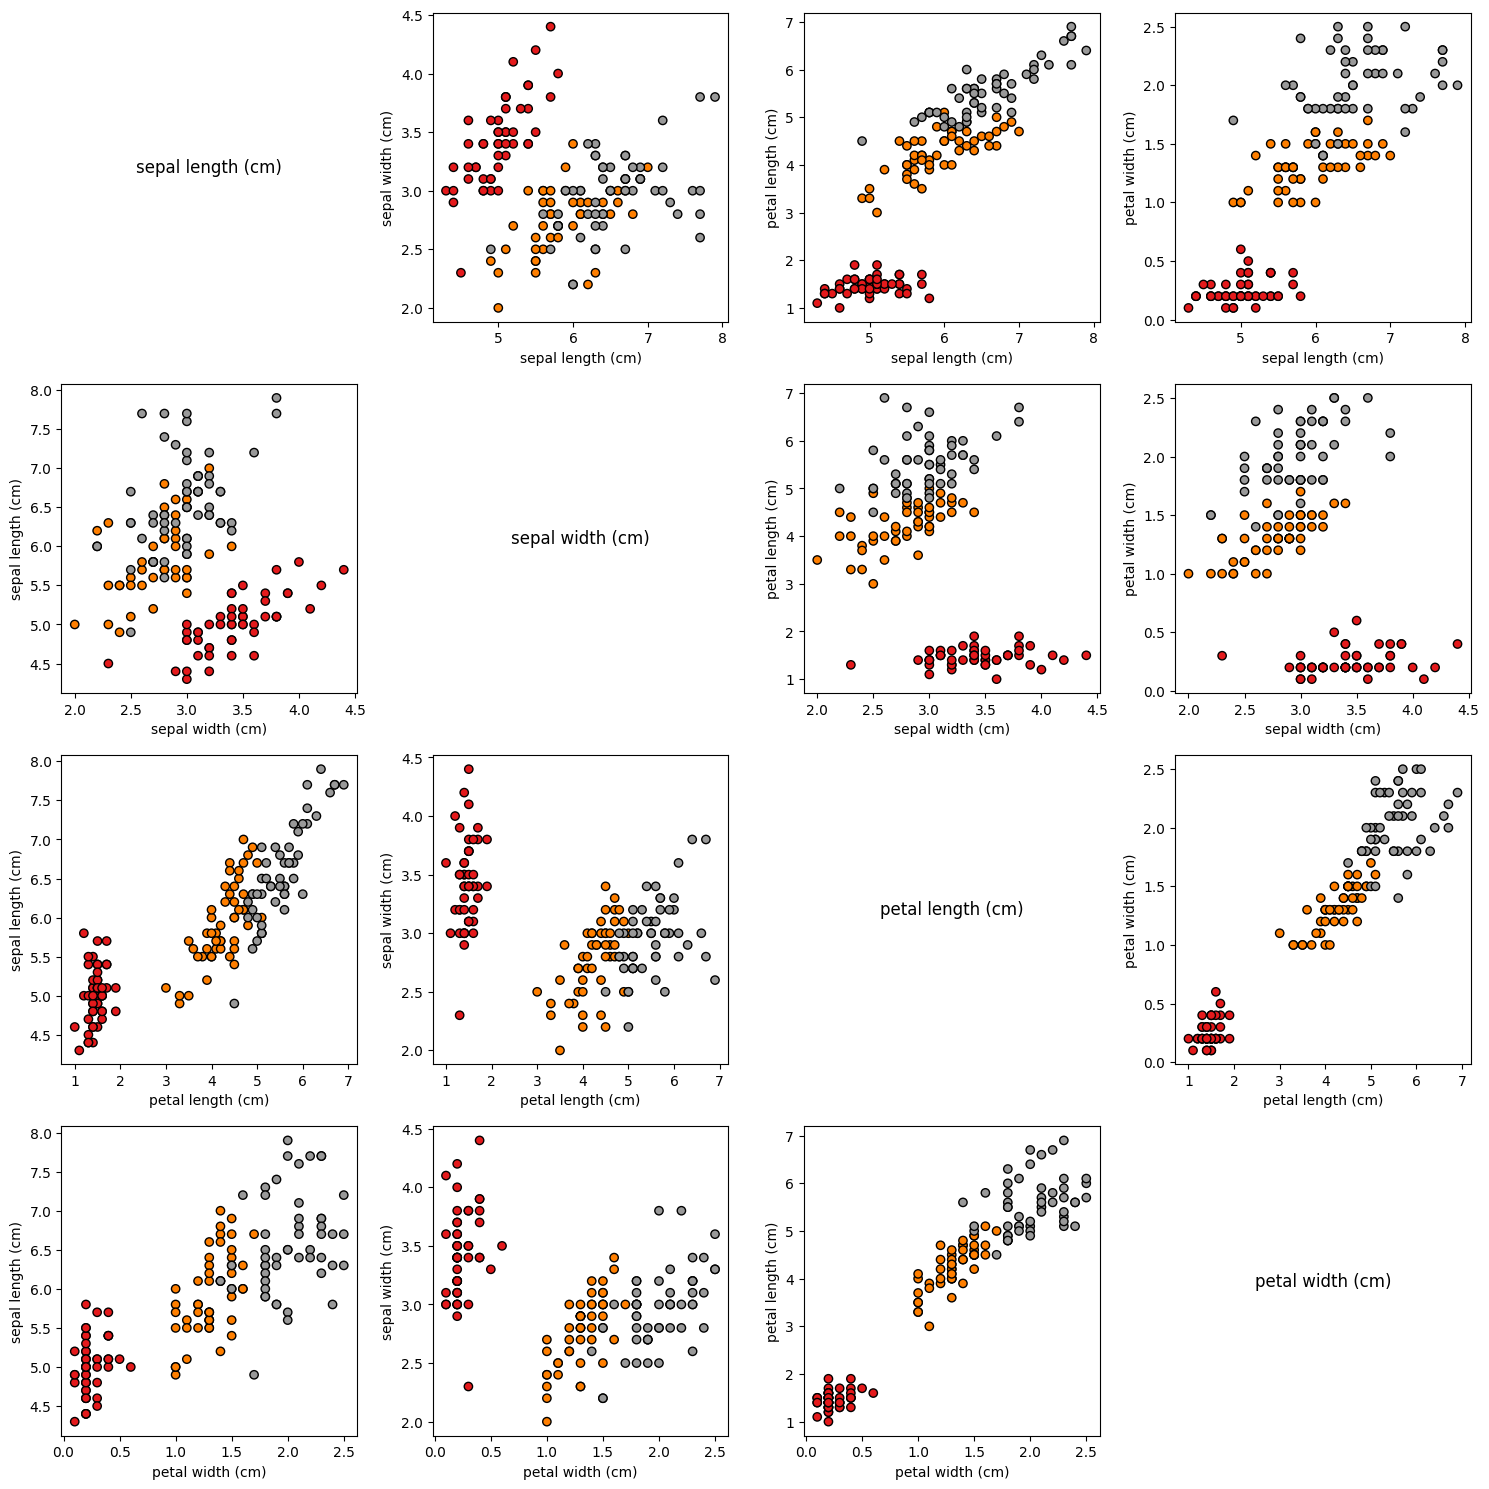

In [ ]:

num_features = X.shape[1]
fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

for i in range(num_features):
    for j in range(num_features):
        if i != j:
            axes[i, j].scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.Set1, edgecolor='k')
            axes[i, j].set_xlabel(feature_names[i])
            axes[i, j].set_ylabel(feature_names[j])
        else:
            axes[i, j].text(0.5, 0.5, feature_names[i], horizontalalignment='center', verticalalignment='center',
                            fontsize=12, transform=axes[i, j].transAxes)
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()

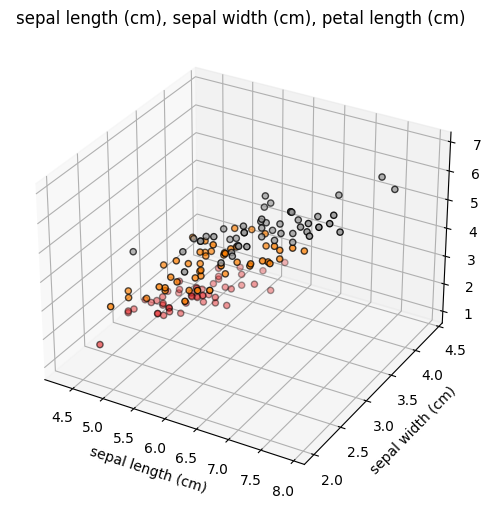

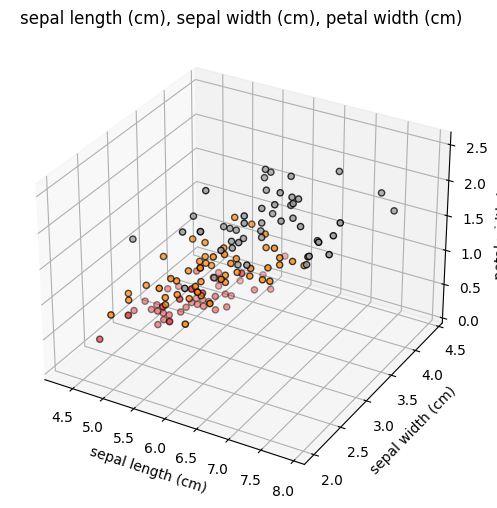

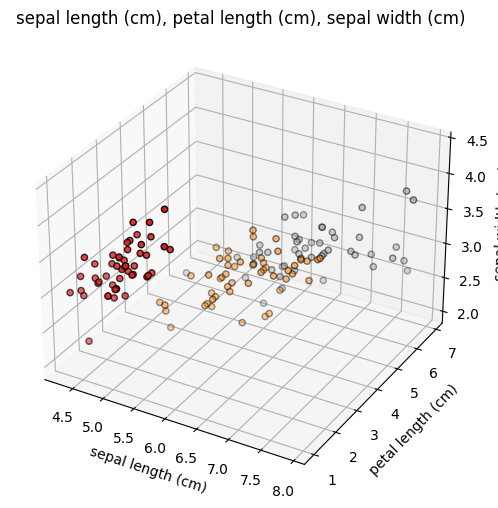

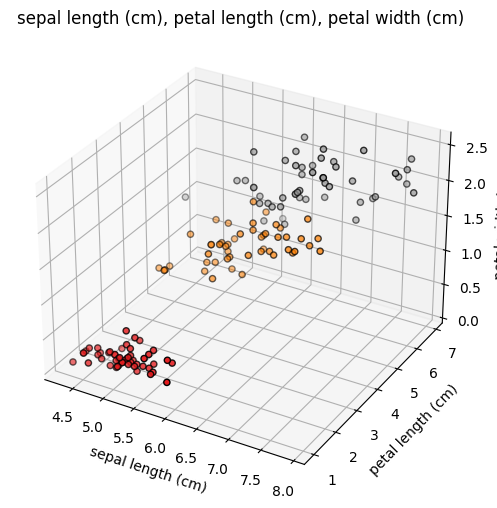

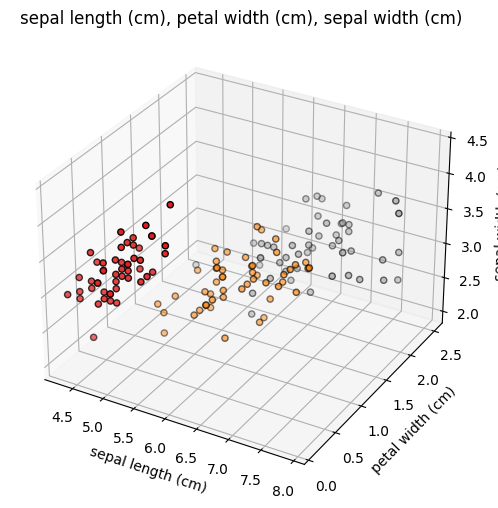

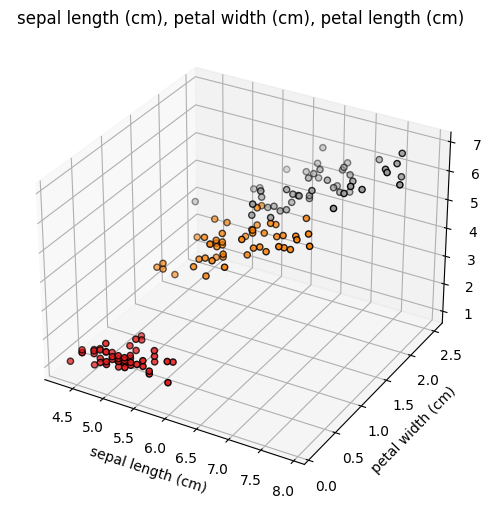

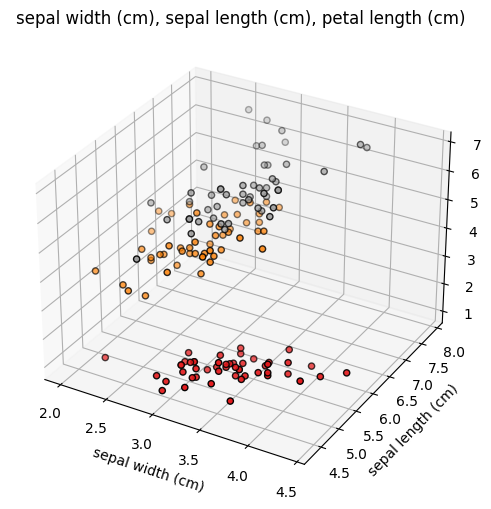

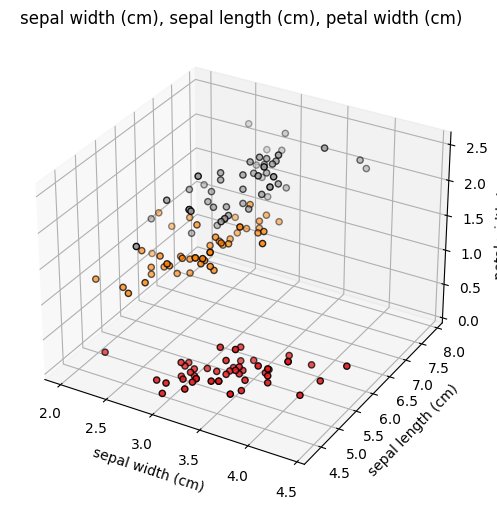

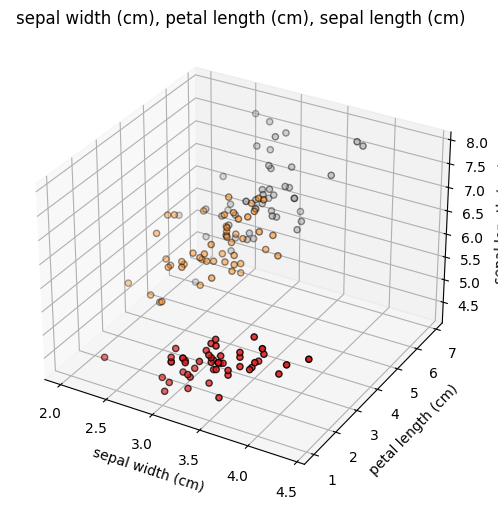

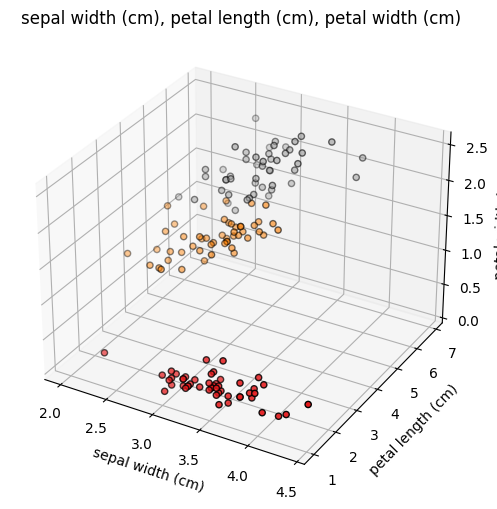

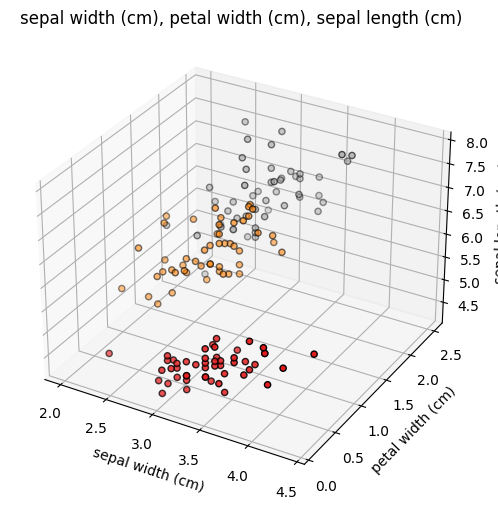

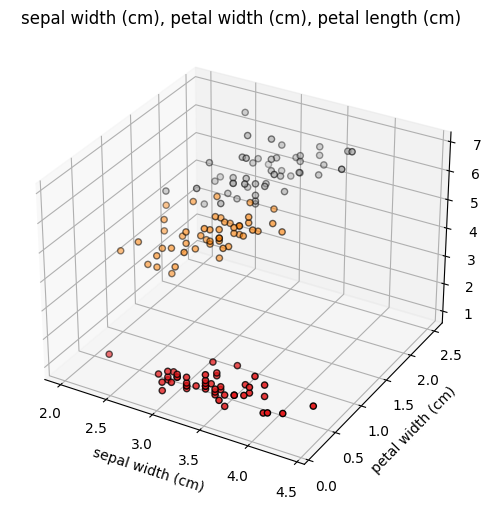

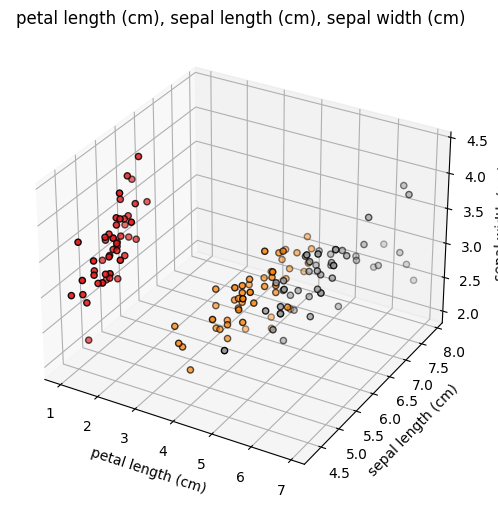

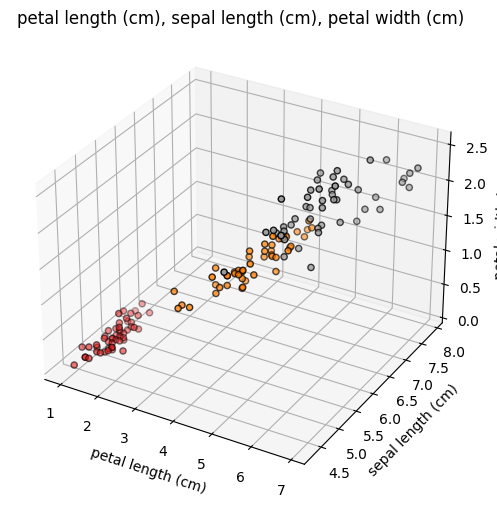

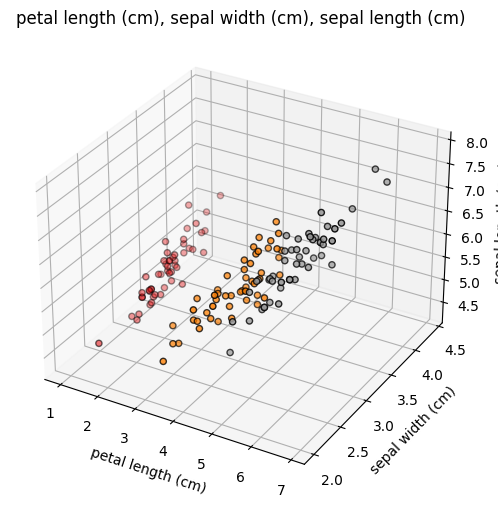

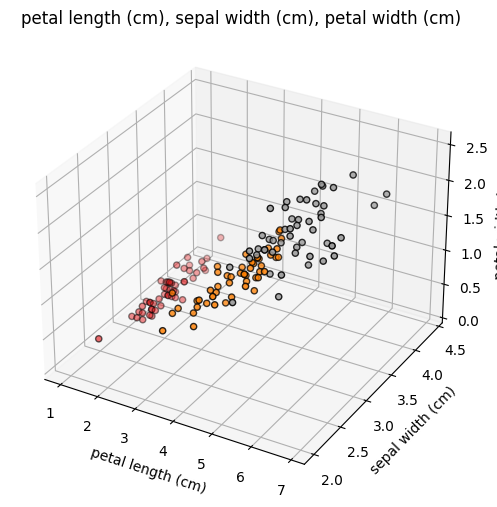

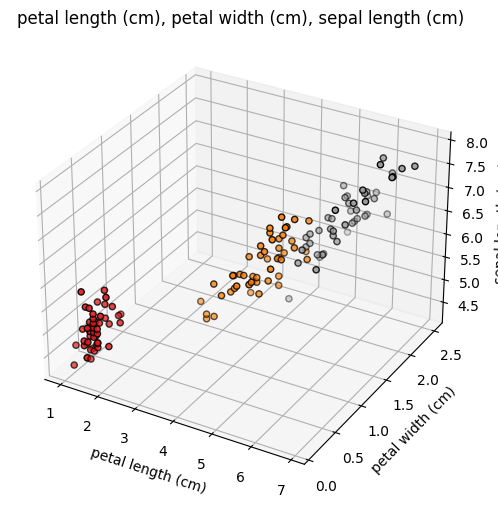

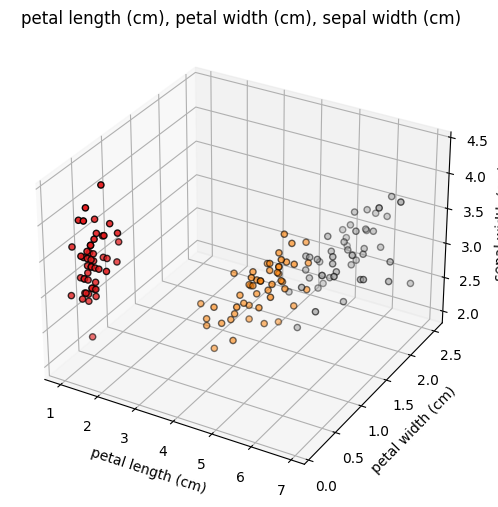

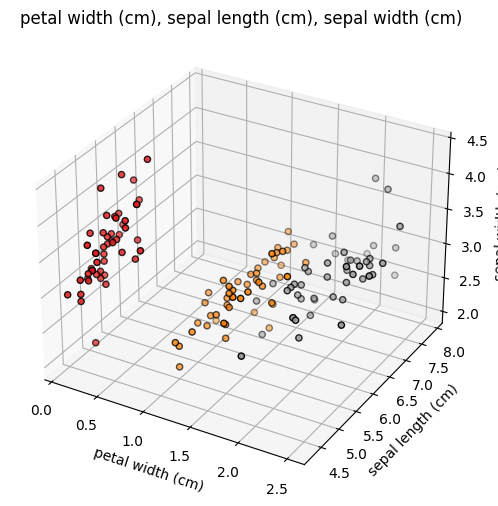

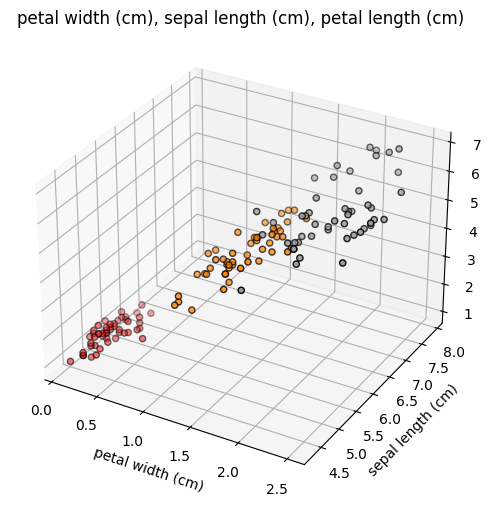

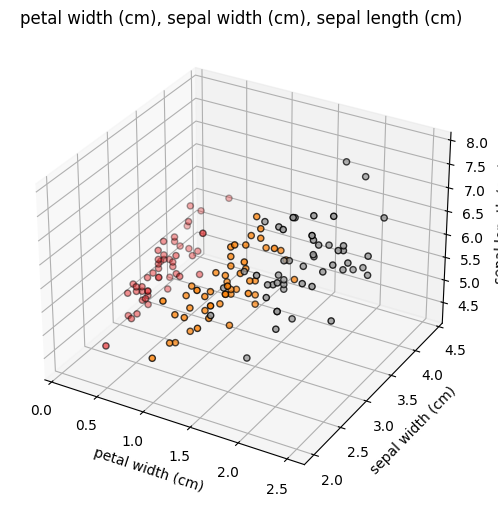

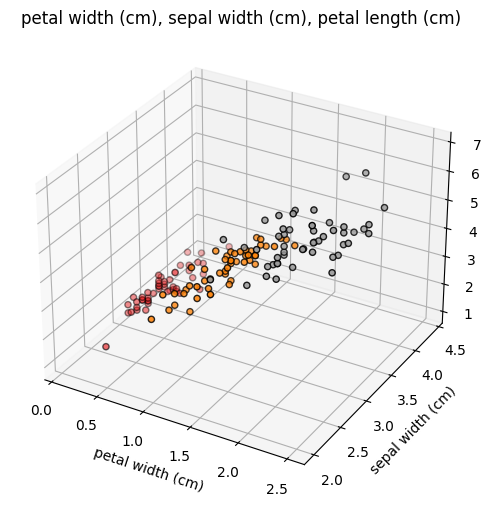

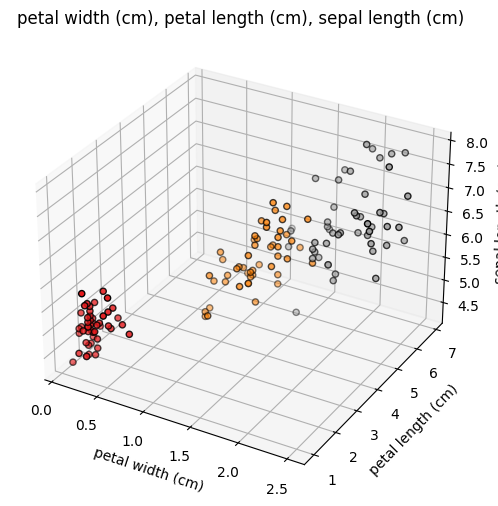

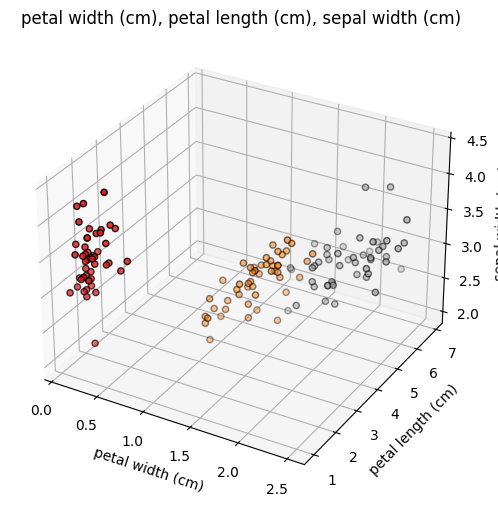

In [ ]:
num_features = X.shape[1]
for i in range(num_features):
    for j in range(num_features):
        if i != j:
            for k in range(num_features):
                if i != k and j != k:
                    fig = plt.figure(figsize=(8, 6))
                    ax = fig.add_subplot(111, projection='3d')
                    ax.scatter(X[:, i], X[:, j], X[:, k], c=y, cmap=plt.cm.Set1, edgecolor='k')
                    ax.set_xlabel(feature_names[i])
                    ax.set_ylabel(feature_names[j])
                    ax.set_zlabel(feature_names[k])
                    plt.title(f"{feature_names[i]}, {feature_names[j]}, {feature_names[k]}")
                    plt.show()

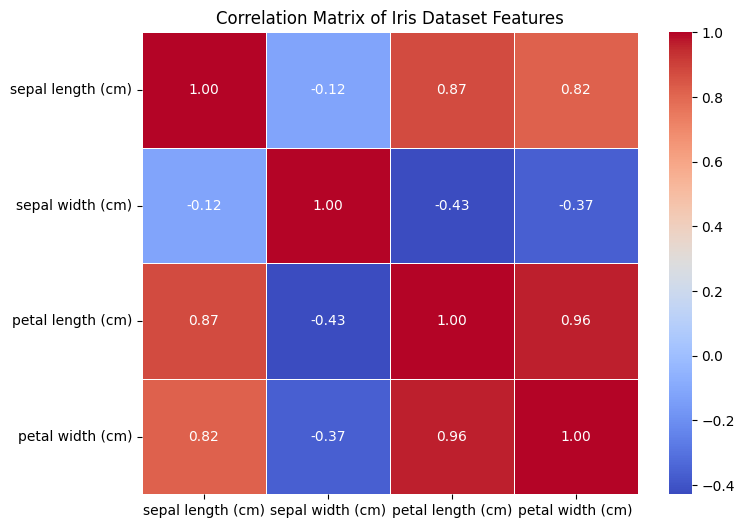

In [ ]:
# Creating a DataFrame with the data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

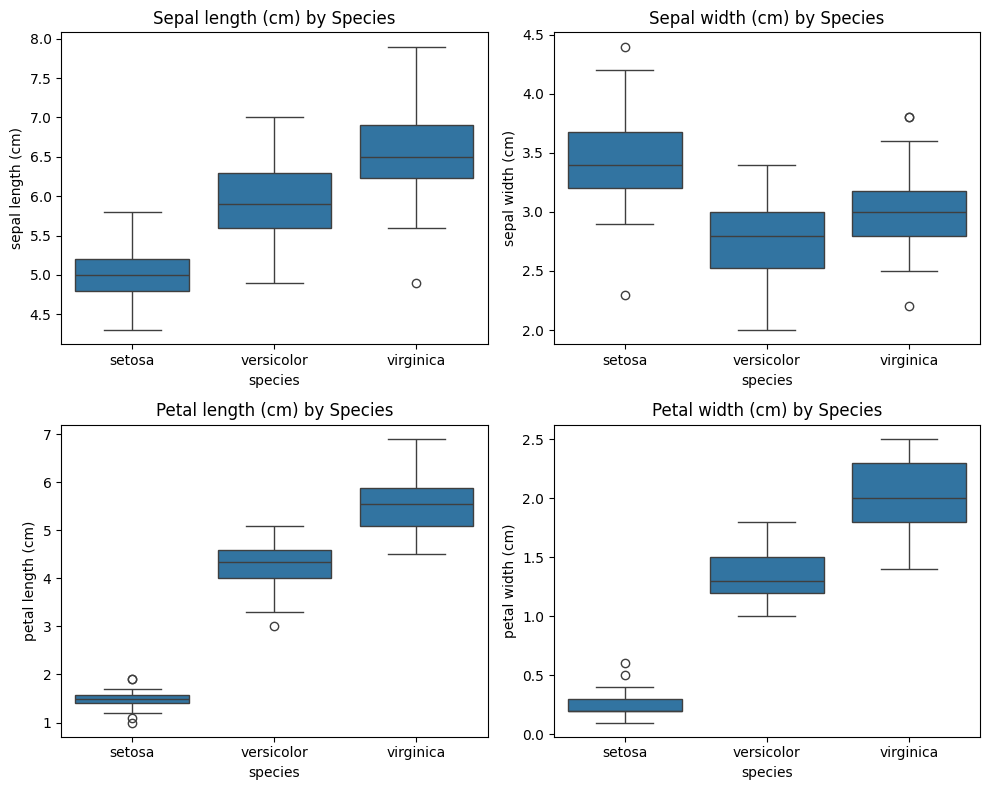

In [ ]:
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Plot boxplots
plt.figure(figsize=(10, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature.capitalize()} by Species')

plt.tight_layout()
plt.show()